# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

Integrantes:  Christian Pérez, Jessica Morales

## Parte 0: Carga del Corpus

In [2]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes')).data[:9000]

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [ ]:
# Configuración
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
# Preprocesamiento
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words and 3 <= len(t) <= 15]
# Procesar corpus y construir vocabulario
processed_docs = [preprocess(doc) for doc in docs]
vocab = sorted(set(term for doc in processed_docs for term in doc))
term_idx = {term: i for i, term in enumerate(vocab)}
# Construir matriz TF
tf_matrix = np.zeros((len(docs), len(vocab)))
for i, doc_terms in enumerate(processed_docs):
    for term, count in {t: doc_terms.count(t) for t in set(doc_terms)}.items():
        tf_matrix[i, term_idx[term]] = count
# Calcular DF, IDF y TF-IDF
df_values = np.sum(tf_matrix > 0, axis=0)
idf_values = np.log(len(docs) / (df_values + 1)) + 1
tfidf_matrix = tf_matrix * idf_values
# TF-IDF con sklearn
vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'\b\w{3,15}\b')
sklearn_tfidf = vectorizer.fit_transform([' '.join(preprocess(doc)) for doc in docs])
# Resultados
top_indices = np.argsort(df_values)[::-1][:50]
results_df = pd.DataFrame({
    'Termino': [vocab[i] for i in top_indices],
    'DF': df_values[top_indices].astype(int),
    'IDF': np.round(idf_values[top_indices], 3),
    'TF-IDF_promedio': np.round(np.mean(tfidf_matrix, axis=0)[top_indices], 4),
    'TF-IDF_maximo': np.round(np.max(tfidf_matrix, axis=0)[top_indices], 4)
})
# Mostrar resultados
print(f"Documentos: {len(docs)} | Vocabulario: {len(vocab)} términos")
print(f"Matriz TF: {tf_matrix.shape} | Matriz sklearn: {sklearn_tfidf.shape}")
display(results_df)
# Matriz TF-IDF 
sklearn_features = vectorizer.get_feature_names_out()
sample_sklearn = pd.DataFrame(
    sklearn_tfidf.toarray()[:5, :10],
    columns=sklearn_features[:10],
    index=[f"Doc_{i}" for i in range(5)]
)
print("\nTF-IDF:")
display(sample_sklearn)

Documentos: 9000 | Vocabulario: 38983 términos
Matriz TF: (9000, 38983) | Matriz sklearn: (9000, 38729)


,Termino,DF,IDF,TF-IDF_promedio,TF-IDF_maximo
0,would,2658,2.219,1.2790,73.2361
1,one,2575,2.251,1.2636,90.0395
2,use,2383,2.328,1.4403,214.2169
3,like,2166,2.424,0.9297,67.8687
4,get,2074,2.467,0.9811,106.0923
5,know,1957,2.525,0.8524,151.5181
6,think,1613,2.719,0.7724,146.7995
7,time,1609,2.721,0.8444,73.4667
8,also,1544,2.762,0.8342,154.6832
9,make,1482,2.803,0.7525,67.2758



TF-IDF:


,aaa,aaaaa,aaaaaaaaaaaa,aaaaarrrrgh,aaack,aaaggghhh,aaah,aaahhhh,aac,aacc
Doc_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
# Parte 2: Ranking de documentos usando TF-IDF
# Consulta
query = "Chicken"
# 1. Vectorizar consulta
query_processed = ' '.join(preprocess(query))
query_vector = vectorizer.transform([query_processed])
# 2. Calcular similitud coseno
similarities = cosine_similarity(query_vector, sklearn_tfidf).flatten()
# 3. Generar ranking (solo documentos con similitud > 0)
relevant_docs = [(i, sim) for i, sim in enumerate(similarities) if sim > 0]
relevant_docs.sort(key=lambda x: x[1], reverse=True)
# 4. Mostrar resultados en tabla
n_results = min(10, len(relevant_docs))
ranking_df = pd.DataFrame({
    'Rank': range(1, n_results + 1),
    'Doc_ID': [doc_id for doc_id, _ in relevant_docs[:n_results]],
    'Similitud': [round(sim, 5) for _, sim in relevant_docs[:n_results]],
    'Texto_Completo': [docs[doc_id][:200] + "..." if len(docs[doc_id]) > 200 
                      else docs[doc_id] for doc_id, _ in relevant_docs[:n_results]]
})
print(f"\nRanking TF-IDF para '{query}' ({len(relevant_docs)} docs relevantes):")
print(f"Vector consulta: {query_vector.shape}")
print(f"Similitudes calculadas: {len(similarities)}")
display(ranking_df)
# Mostrar términos de la consulta en vocabulario
query_terms = preprocess(query)
query_in_vocab = [term for term in query_terms if term in vocab]
print(f"\nTérminos consulta procesados: {query_terms}")
print(f"Términos encontrados en vocabulario: {query_in_vocab}")


Ranking TF-IDF para 'Chicken' (11 docs relevantes):
Vector consulta: (1, 38729)
Similitudes calculadas: 9000


,Rank,Doc_ID,Similitud,Texto_Completo
0,1,1315,0.30589,\nBut remember that had God extinguished the b...
1,2,357,0.19394,i read about the code you can put in to most a...
2,3,2686,0.18501,\nSince the FBI's account of what happened is ...
3,4,897,0.18304,\n\nYou're reading far too much into this (asi...
4,5,5738,0.16600,\n\nPlease note that Bill Clinton probably has...
5,6,8930,0.11146,"\n\n\n\n\n\n\nSo, who is Mykotronx, Inc.? It ..."
6,7,6615,0.09434,"<\n<>If the Clinton Clipper is so very good, [..."
7,8,3360,0.08605,"\n\nAwww, right, you want all the home mechani..."
8,9,6019,0.05594,\nI agree with Carol here. Determining absolu...
9,10,3175,0.04806,"Hi,\n\nI've just returned from a visit with my..."



Términos consulta procesados: ['chicken']
Términos encontrados en vocabulario: ['chicken']


## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [5]:
from rank_bm25 import BM25Okapi
# Parte 3: Ranking con BM25
# 1. Implementar BM25
tokenized_docs = [preprocess(doc) for doc in docs]
bm25 = BM25Okapi(tokenized_docs)
# 2. Calcular scores para la consulta
query_tokens = preprocess(query)
bm25_scores = bm25.get_scores(query_tokens)
# 3. Crear DataFrame comparativo con TF-IDF
comparison_df = pd.DataFrame({
    'Doc_ID': range(len(docs)),
    'BM25_Score': np.round(bm25_scores, 4),
    'TFIDF_Score': np.round(similarities, 4),
    'Texto': [doc[:150] + "..." if len(doc) > 150 else doc for doc in docs]
})
# 4. Filtrar y ordenar por BM25
relevant_comparison = comparison_df[comparison_df['BM25_Score'] > 0].copy()
relevant_comparison = relevant_comparison.sort_values('BM25_Score', ascending=False).reset_index(drop=True)
relevant_comparison['Rank'] = range(1, len(relevant_comparison) + 1)
# Reordenar columnas
final_df = relevant_comparison[['Rank', 'Doc_ID', 'BM25_Score', 'TFIDF_Score', 'Texto']]
# Mostrar resultados
print(f"\nComparación BM25 vs TF-IDF para '{query}':")
print(f"Documentos relevantes: {len(relevant_comparison)}")
# Top 10 resultados
display(final_df.head(10))


Comparación BM25 vs TF-IDF para 'Chicken':
Documentos relevantes: 11


,Rank,Doc_ID,BM25_Score,TFIDF_Score,Texto
0,1,1315,10.1212,0.3059,\nBut remember that had God extinguished the b...
1,2,357,8.5772,0.1939,i read about the code you can put in to most a...
2,3,2686,8.3556,0.1850,\nSince the FBI's account of what happened is ...
3,4,5738,7.5287,0.1660,\n\nPlease note that Bill Clinton probably has...
4,5,897,7.2363,0.1830,\n\nYou're reading far too much into this (asi...
5,6,8930,5.7280,0.1115,"\n\n\n\n\n\n\nSo, who is Mykotronx, Inc.? It ..."
6,7,3360,4.7410,0.0861,"\n\nAwww, right, you want all the home mechani..."
7,8,6615,4.4783,0.0943,"<\n<>If the Clinton Clipper is so very good, [..."
8,9,6019,3.1560,0.0559,\nI agree with Carol here. Determining absolu...
9,10,3175,2.8626,0.0481,"Hi,\n\nI've just returned from a visit with my..."


## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

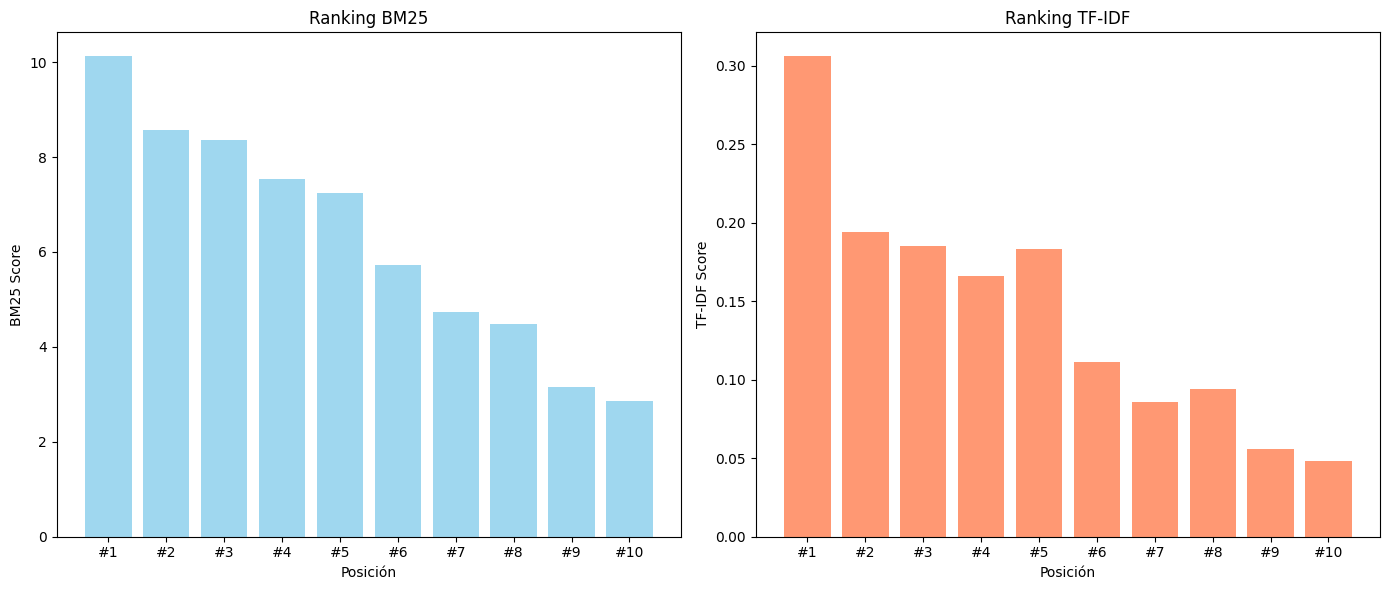

Top 10 documentos para 'Chicken':


,Rank,Doc_ID,BM25_Score,TFIDF_Score
0,1,1315,10.1212,0.3059
1,2,357,8.5772,0.1939
2,3,2686,8.3556,0.1850
3,4,5738,7.5287,0.1660
4,5,897,7.2363,0.1830
5,6,8930,5.7280,0.1115
6,7,3360,4.7410,0.0861
7,8,6615,4.4783,0.0943
8,9,6019,3.1560,0.0559
9,10,3175,2.8626,0.0481


In [ ]:
import matplotlib.pyplot as plt
# Top 10 documentos
top_10 = final_df.head(10)
# Gráficos de barras separados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Gráfico BM25
ax1.bar(range(len(top_10)), top_10['BM25_Score'], color='skyblue', alpha=0.8)
ax1.set_title('Ranking BM25')
ax1.set_xlabel('Posición')
ax1.set_ylabel('BM25 Score')
ax1.set_xticks(range(len(top_10)))
ax1.set_xticklabels([f'#{i+1}' for i in range(len(top_10))])
# Gráfico TF-IDF
ax2.bar(range(len(top_10)), top_10['TFIDF_Score'], color='coral', alpha=0.8)
ax2.set_title('Ranking TF-IDF')
ax2.set_xlabel('Posición')
ax2.set_ylabel('TF-IDF Score')
ax2.set_xticks(range(len(top_10)))
ax2.set_xticklabels([f'#{i+1}' for i in range(len(top_10))])
plt.tight_layout()
plt.show()
# Tabla comparativa Top 10
comparison_top10 = top_10[['Rank', 'Doc_ID', 'BM25_Score', 'TFIDF_Score']].copy()
print(f"Top 10 documentos para '{query}':")
display(comparison_top10)

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [ ]:
# 1. Cambiar consulta
query = "kentucky chicken"
query_tokens = preprocess(query)
query_processed = ' '.join(query_tokens)
# Recalcular scores para nueva consulta
bm25_scores = bm25.get_scores(query_tokens)
query_vector = vectorizer.transform([query_processed])
similarities = cosine_similarity(query_vector, sklearn_tfidf).flatten()
# Actualizar DataFrame existente
comparison_df['BM25_Score'] = np.round(bm25_scores, 4)
comparison_df['TFIDF_Score'] = np.round(similarities, 4)
# Reutilizar filtrado y ordenamiento 
relevant_comparison = comparison_df[comparison_df['BM25_Score'] > 0].copy()
relevant_comparison = relevant_comparison.sort_values('BM25_Score', ascending=False).reset_index(drop=True)
relevant_comparison['Rank'] = range(1, len(relevant_comparison) + 1)
final_df = relevant_comparison[['Rank', 'Doc_ID', 'BM25_Score', 'TFIDF_Score', 'Texto']]
print(f"Top 5 para '{query}' :")
display(final_df.head(5))
# 2. Definir documentos relevantes y evaluar
relevant_docs = {1315, 0, 2613}  # Ajustar según inspección del top 5
def precision_at_k(ranked_doc_ids, relevant_docs, k=3):
    hits = [1 if doc_id in relevant_docs else 0 for doc_id in ranked_doc_ids[:k]]
    return sum(hits) / k
def average_precision(ranked_doc_ids, relevant_docs):
    hits, score = 0, 0.0
    for i, doc_id in enumerate(ranked_doc_ids, 1):
        if doc_id in relevant_docs:
            hits += 1
            score += hits / i
    return score / max(len(relevant_docs), 1)
# Rankings y evaluación
bm25_ranking = final_df['Doc_ID'].tolist()
tfidf_ranking = final_df.sort_values('TFIDF_Score', ascending=False)['Doc_ID'].tolist()
bm25_p3 = precision_at_k(bm25_ranking, relevant_docs, k=3)
tfidf_p3 = precision_at_k(tfidf_ranking, relevant_docs, k=3)
bm25_map = average_precision(bm25_ranking, relevant_docs)
tfidf_map = average_precision(tfidf_ranking, relevant_docs)
print(f"\nEvaluación para '{query}':")
print(f"BM25:   Precision@3 = {bm25_p3:.2f}  |  MAP = {bm25_map:.2f}")
print(f"TF-IDF: Precision@3 = {tfidf_p3:.2f}  |  MAP = {tfidf_map:.2f}")

Top 5 para 'kentucky chicken' - Definir relevancia:


,Rank,Doc_ID,BM25_Score,TFIDF_Score,Texto
0,1,2613,11.4907,0.2500,"Wing ding XV will take place in Louisville, Ke..."
1,2,2481,10.6053,0.1519,"-- \n73, Tom\n================================..."
2,3,1315,10.1212,0.2106,\nBut remember that had God extinguished the b...
3,4,357,8.5772,0.1335,i read about the code you can put in to most a...
4,5,2686,8.3556,0.1274,\nSince the FBI's account of what happened is ...



Evaluación para 'kentucky chicken':
BM25:   Precision@3 = 0.67  |  MAP = 0.56
TF-IDF: Precision@3 = 0.67  |  MAP = 0.67
